# Chronic Disease Analysis using Pandas

The overall purpose of this project is to provide basic analysis of chronic disease prevalence and associated Medicare cost in the US and within a subset of states.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import data
data = pd.read_csv('./chronic-disease-data.csv')

# Chronic disease prevalence 

This section has two distinct purposes:

-Demonstrate the prevalence of chronic conditions, specific to race and age groups

-Compare data on a national level and within a subset of states (Texas, New York, California, and Florida).

### National-Level Analysis by Age

In [3]:
#slice dataset for columns of interest: national-level analysis based on age
cdp = data[['Bene_Geo_Desc','Bene_Age_Lvl','Bene_Cond','Prvlnc', 'Bene_Demo_Lvl']]

In [4]:
#clean data
#remove rows with 'All' in age group, select only rows with 'Sex' in Bene_Demo_Lvl column, and select only rows with 'National' in Bene_Geo_Desc
cdp_national = cdp[(cdp.Bene_Age_Lvl != 'All') & (cdp.Bene_Demo_Lvl == 'Sex') & (cdp.Bene_Geo_Desc == 'National')]

In [5]:
#National Metrics: group by condition, age level, and state; sum the prevalence of each chronic condition for each group
national_cdp = cdp_national.groupby(['Bene_Cond','Bene_Age_Lvl','Bene_Geo_Desc']).agg({'Prvlnc' : 'sum'})

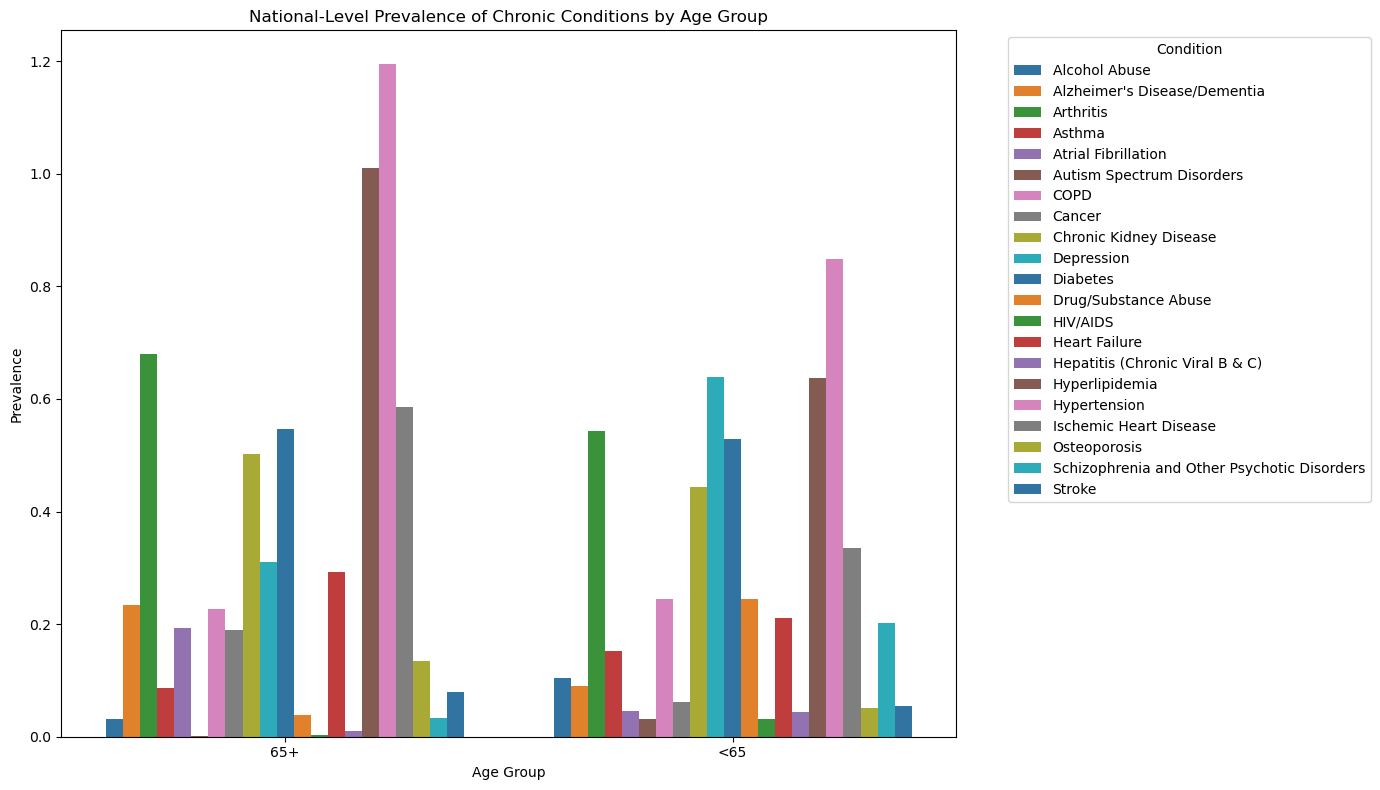

In [6]:
#plot data
national_barchart_data = national_cdp.reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(
    data=national_barchart_data,
    x='Bene_Age_Lvl', #set x-axis as Age
    y='Prvlnc',       #set y=axis as Prevalence
    hue='Bene_Cond',
    errorbar = None,
    palette='tab10'
)
plt.title("National-Level Prevalence of Chronic Conditions by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Prevalence")
plt.legend(title="Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The above graph shows national prevalence of chronic conditions, split into two grouped barcharts based on age (65+ and <65). Chronic conditions are color-coded, and a legend can be found on the righthand side. In the 65+ age group, COPD appears the have the highest prevalence out of all chronic conditions in that age group. Depression (color-coded as teal), appears the be the 2nd most prevalent chronic condition in the <65 age group.

### National-Level Analysis by Race

In [7]:
#slice dataset for columns of interest: national-level analysis based on race
cdp_national_race = data[['Bene_Geo_Desc','Bene_Age_Lvl','Bene_Demo_Lvl','Bene_Demo_Desc','Bene_Cond','Prvlnc']]

#Filter for columns with 'All' in Bene_Age_Lvl column, 'National' in Bene_Geo_Desc, and 'Race' in Bene_Demo_Lvl column
cdp_national_race = cdp_national_race[(cdp_national_race.Bene_Age_Lvl == 'All') & (cdp_national_race.Bene_Geo_Desc == 'National') & (cdp_national_race.Bene_Demo_Lvl == 'Race')]

#remove rows with missing data
cdp_national_race = cdp_national_race[(cdp_national_race.Prvlnc != 'Nan')]

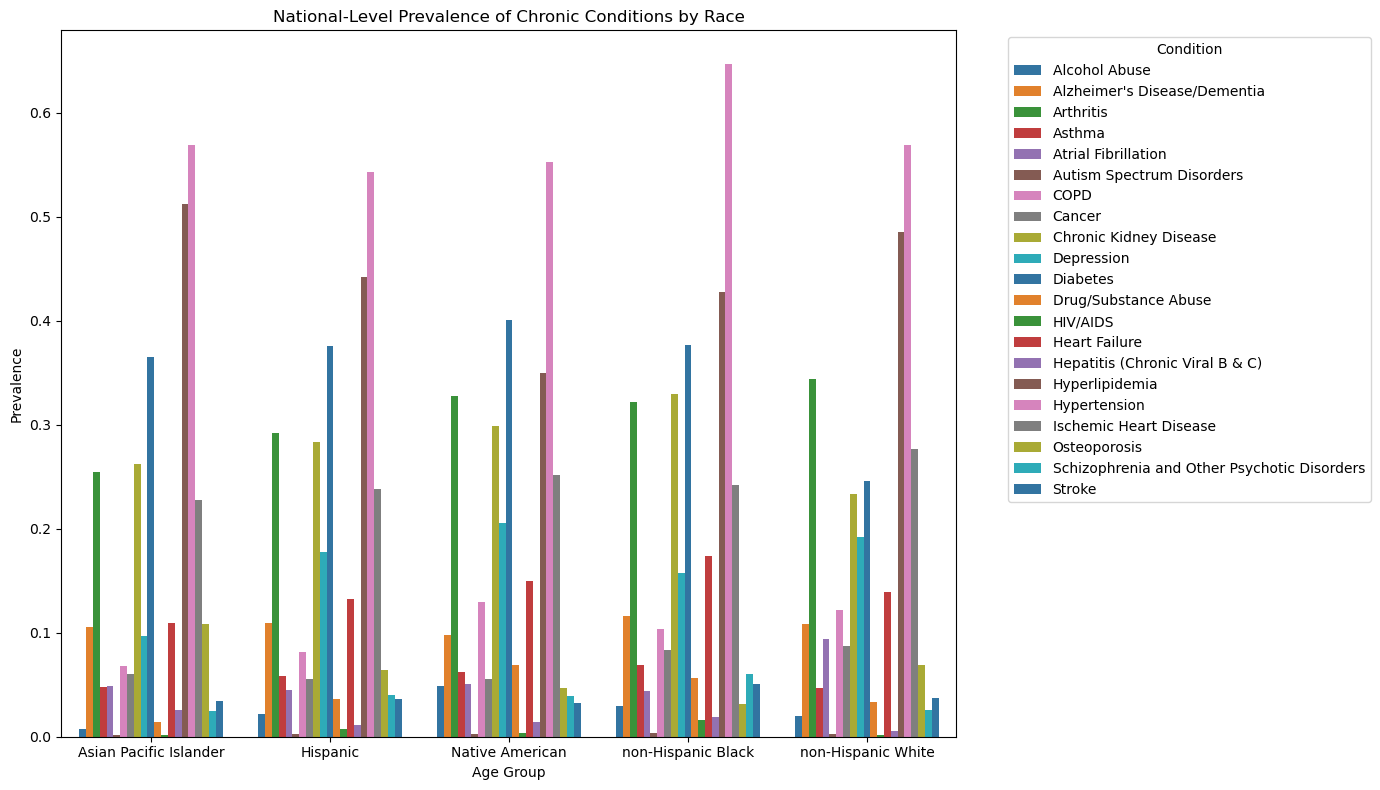

In [8]:
#plot data
national_race_barchart_data = cdp_national_race.reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(
    data=national_race_barchart_data,
    x='Bene_Demo_Desc', #set x-axis as Race
    y='Prvlnc',       #set y-axis as prevalence
    hue='Bene_Cond',
    errorbar = None,
    palette='tab10'
)
plt.title("National-Level Prevalence of Chronic Conditions by Race")
plt.xlabel("Age Group")
plt.ylabel("Prevalence")
plt.legend(title="Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The above visualization plots the national prevalence of each chronic condition, split by race.
Chronic conditions are color-coded and a legend can be found on the right-hand side
Chronic conditions are also organized in alphabetical order for each racial group in the barplot.
For example, based on the above plot, COPD (color-coded as pink) is the most prevalent chronic condition across all races, with the non-Hispanic Black population having the highest overall prevalence of COPD across all racial groups. HIV/AIDS (color-coded as green) is the 3rd most prevalent chronic condition in the non-Hispanic White population, and non-Hispanic Whites appear to have the highest prevalence of HIV/AIDS compared to all other racial groups

### State-Level Analysis by Age

In [9]:
#slice dataset for columns of interest: state-level analysis from the national-level analysis 
state_cdp = cdp[(cdp.Bene_Geo_Desc =='Texas') | (cdp.Bene_Geo_Desc == 'New York') | (cdp.Bene_Geo_Desc == 'California') |(cdp.Bene_Geo_Desc =='Florida')]

#select for just columns with 'Sex' in Bene_Demo_Lvl column
state_cdp = state_cdp[(state_cdp.Bene_Demo_Lvl == 'Sex')]

#remove rows with 'All' in Bene_Age_Lvl column
state_cdp = state_cdp[(state_cdp.Bene_Age_Lvl != 'All')]

In [10]:
#State Metrics: group by condition, age level, and state; sum the prevalence of each chronic condition for each group
state_cdp_groups = state_cdp.groupby(['Bene_Cond','Bene_Age_Lvl','Bene_Geo_Desc']).agg({'Prvlnc' : 'sum'})

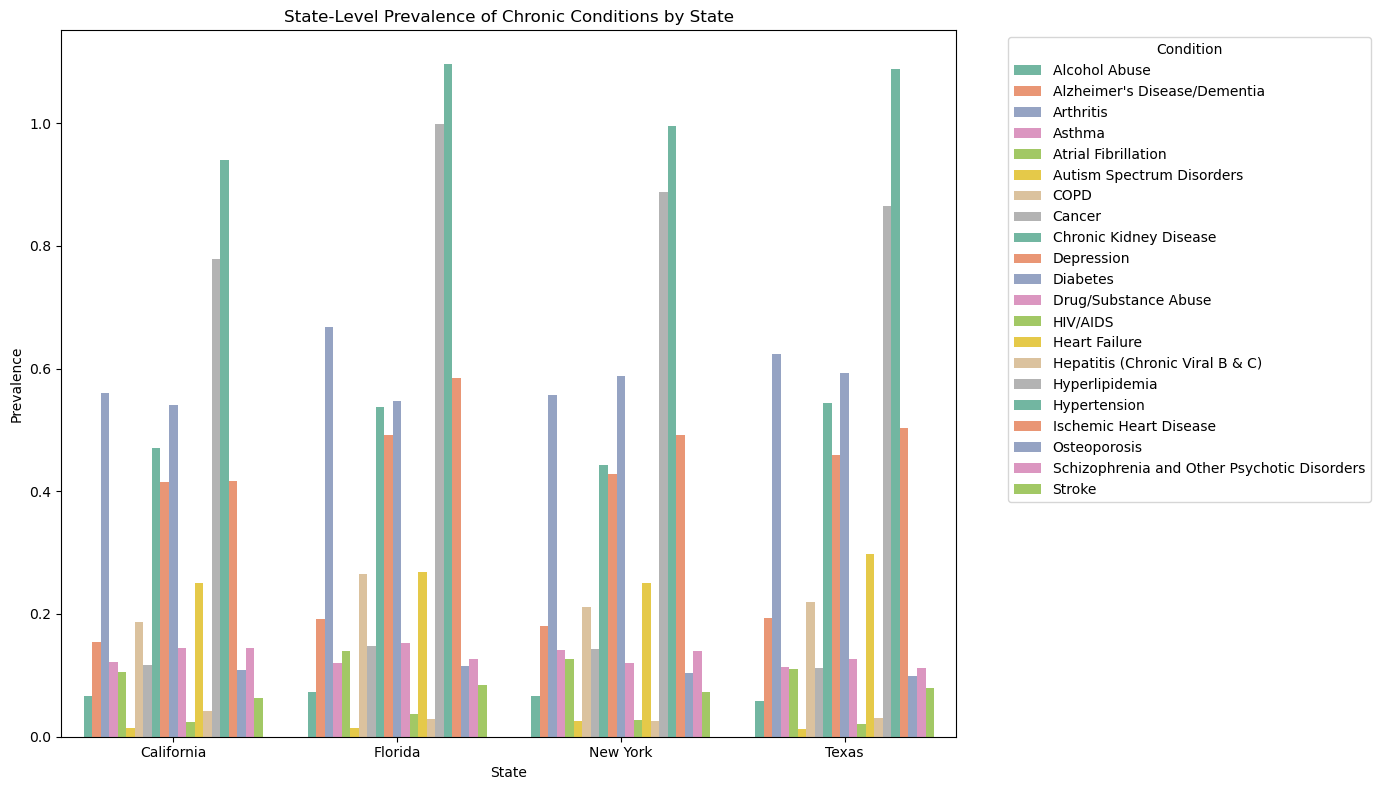

In [11]:
#plot data
state_barchart_data = state_cdp_groups.reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(
    data=state_barchart_data,
    x='Bene_Geo_Desc',
    y='Prvlnc',
    hue='Bene_Cond',
    errorbar=None,
    palette='Set2'
)
plt.title("State-Level Prevalence of Chronic Conditions by State")
plt.xlabel("State")
plt.ylabel("Prevalence")
plt.legend(title="Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### State-Level Analysis by Race

In [12]:
#slice dataset for columns of interest: state-level analysis based on race
cdp_state_race = data[['Bene_Geo_Desc','Bene_Age_Lvl','Bene_Demo_Lvl','Bene_Demo_Desc','Bene_Cond','Prvlnc']]

#filter for states of interest
cdp_state_race = cdp_state_race[(cdp_state_race.Bene_Geo_Desc =='Texas') | (cdp_state_race.Bene_Geo_Desc == 'New York') | (cdp_state_race.Bene_Geo_Desc == 'California') |(cdp_state_race.Bene_Geo_Desc =='Florida')]

#filter for rows with 'All' in Bene_Age_Lvl and 'Race' in Bene_Demo_Lvl
cdp_state_race = cdp_state_race[(cdp_state_race.Bene_Age_Lvl == 'All') & (cdp_state_race.Bene_Demo_Lvl == 'Race')]

# Medicare utilization analysis 

The purpose of this section is to provide a broad analysis of Medicare costs associated with chronic conditions in the US and within a subset of states

### National-Level Medicare Utilization Analysis

In [13]:
#slice dataset of interest
mu = data[['Bene_Geo_Desc','Bene_Age_Lvl','Bene_Cond','Bene_Demo_Lvl','Bene_Demo_Desc','Tot_Mdcr_Pymt_PC']]

In [14]:
#filter for rows with 'All' in Bene_Age_Lvl, Bene_Demo_Lvl, & Bene_Demo_Desc columns for DataFrame with only rows with values in Tot_Mdcr_Pymt_PC column
mu = mu[(mu.Bene_Age_Lvl == 'All') & (mu.Bene_Demo_Lvl == 'All') & (mu.Bene_Demo_Desc == 'All')]

#Filter for national data
mu_national = mu[(mu.Bene_Geo_Desc == 'National')]
mu_national

,Bene_Geo_Desc,Bene_Age_Lvl,Bene_Cond,Bene_Demo_Lvl,Bene_Demo_Desc,Tot_Mdcr_Pymt_PC
7371,National,All,Alcohol Abuse,All,All,26840.9981
7384,National,All,Alzheimer's Disease/Dementia,All,All,26895.5912
7397,National,All,Arthritis,All,All,16890.0457
7410,National,All,Asthma,All,All,22388.8296
7423,National,All,Atrial Fibrillation,All,All,27124.2354
7436,National,All,Autism Spectrum Disorders,All,All,8893.6594
7449,National,All,COPD,All,All,27255.4009
7462,National,All,Cancer,All,All,21794.9337
7475,National,All,Chronic Kidney Disease,All,All,23983.0042
7488,National,All,Depression,All,All,21810.7440


/var/folders/db/00b5nl595fldz7p9j42cw4q80000gn/T/ipykernel_54681/1219571160.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


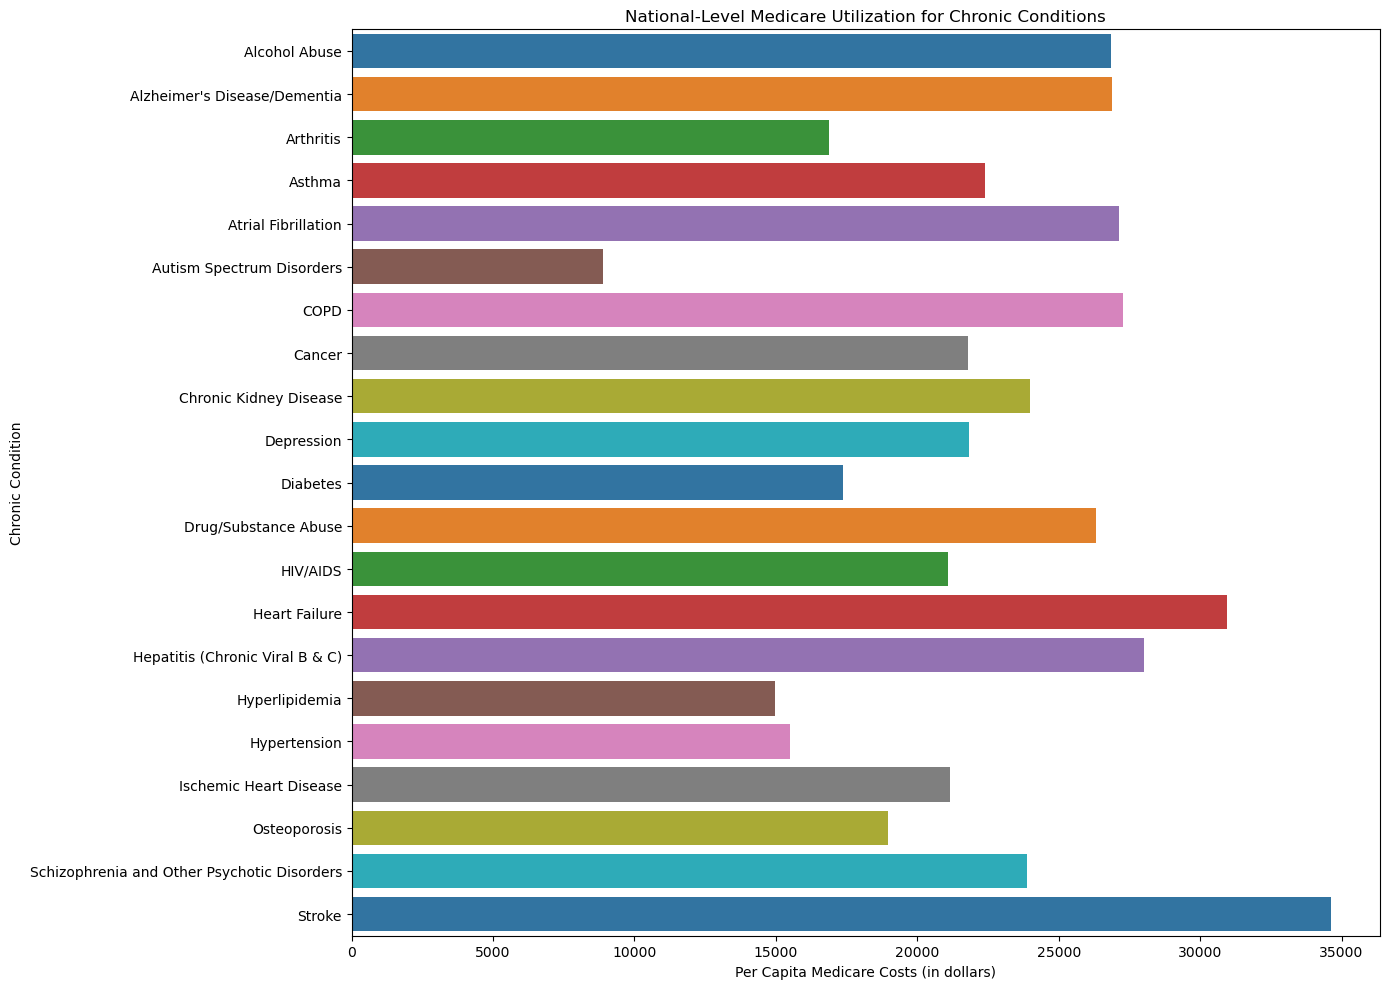

In [15]:
#plot data
mu_national_barchart = mu_national.reset_index()

plt.figure(figsize=(14,10))
sns.barplot(
    data=mu_national_barchart,
    x='Tot_Mdcr_Pymt_PC', #set x-axis as Total Medicare Payment
    y='Bene_Cond',       #set y=axis as Condition
    errorbar = None,
    palette='tab10'
)
plt.title("National-Level Medicare Utilization for Chronic Conditions")
plt.xlabel("Per Capita Medicare Costs (in dollars)")
plt.ylabel("Chronic Condition")
plt.tight_layout()
plt.show()

In the above barchart, national-level per capita medicare costs for most common chronic diseases is graphed. Chronic conditions are organized in alphabetical order. Based on the graph, 'Stroke' appears to have the highest per capita Medicare costs in the US at just under $35,000.

### State-Level Medicare Utilization Analysis

In [16]:
#from cleaned mu dataframe, filter for states of interest
state_mu = mu[(mu.Bene_Geo_Desc =='Texas') | (mu.Bene_Geo_Desc == 'New York') | (mu.Bene_Geo_Desc == 'California') |(mu.Bene_Geo_Desc =='Florida')]

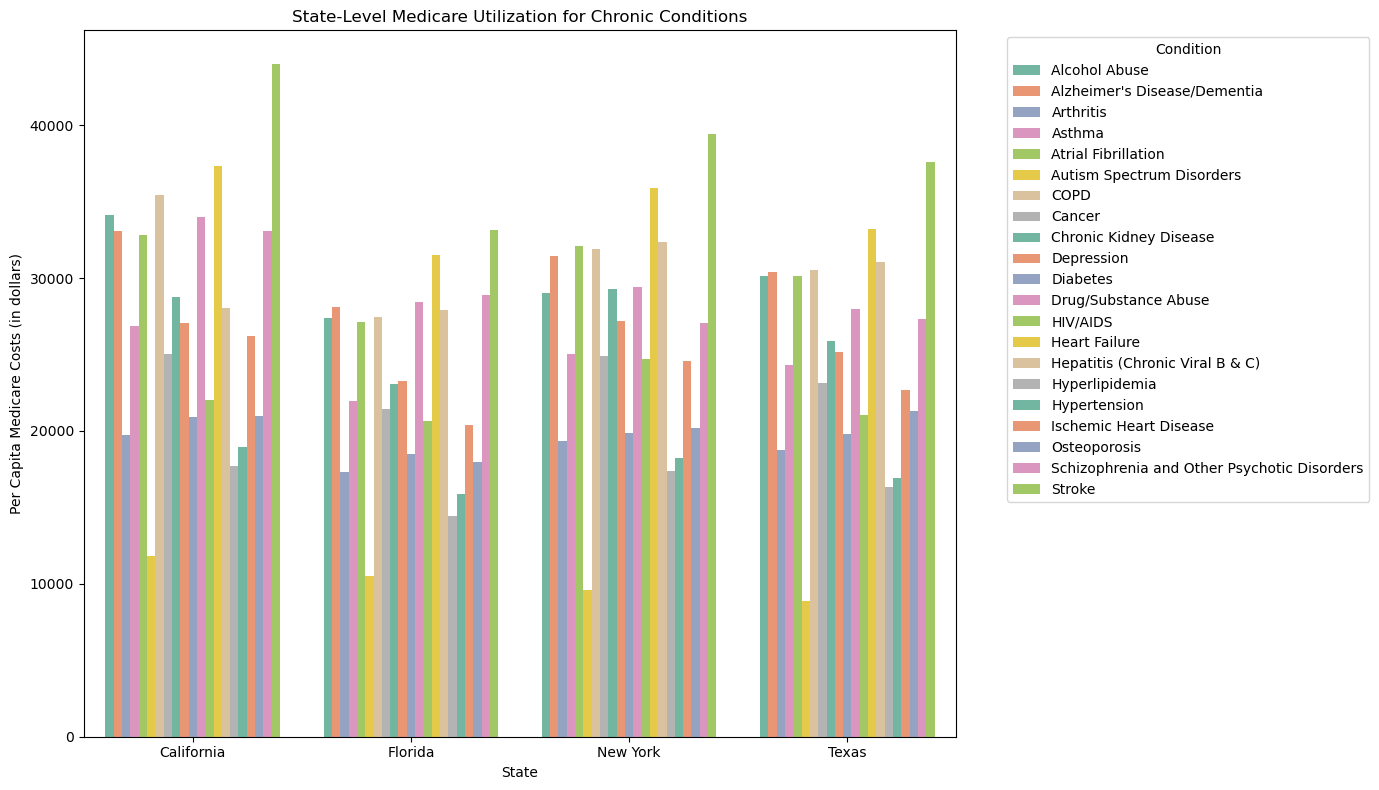

In [17]:
#plot data
state_mu_barchart = state_mu.reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(
    data=state_mu_barchart,
    x='Bene_Geo_Desc',
    y='Tot_Mdcr_Pymt_PC',
    hue='Bene_Cond',
    errorbar=None,
    palette='Set2'
)
plt.title("State-Level Medicare Utilization for Chronic Conditions")
plt.xlabel("State")
plt.ylabel("Per Capita Medicare Costs (in dollars)")
plt.legend(title="Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In the above barchart, State-level per capita Medicare utilization is graphed for 4 states: California, Florida, New York, and Texas. Chronic conditions are color-coded with a legend on the righthand side. Per capita Medicare utilization is presented in US dollars. Similarly to national-level data, stroke appears to have the highest per capita Medicare costs, with California having the highest per capita costs for stroke in this cohort.

# State-wise prevalence analysis

The purpose of this section is to identify states that have the highest and lowest prevalence compared to the national average, stratifying the data by race and sex.

In [18]:
#slice data for dataset of interest
sp = data[['Bene_Geo_Desc','Bene_Age_Lvl','Bene_Demo_Lvl','Bene_Demo_Desc','Bene_Cond','Prvlnc']]

### Gender-Level Analysis

In [19]:
#For gender-level analysis, filter dataset for 'Bene_Demo_Lvl' = Sex and Bene_Age_Lvl = All
sp_gender = sp[(sp.Bene_Demo_Lvl == 'Sex') & (sp.Bene_Age_Lvl == 'All')]

In [20]:
#identify min and max
gender_max_state = sp_gender.loc[sp_gender.groupby(['Bene_Cond', 'Bene_Demo_Desc'])['Prvlnc'].idxmax()]
gender_min_state = sp_gender.loc[sp_gender.groupby(['Bene_Cond', 'Bene_Demo_Desc'])['Prvlnc'].idxmin()]

In [21]:
#Concat into new dataframe
gender_max_state['Type'] = 'Max'
gender_min_state['Type'] = 'Min'

gender_prevalence = pd.concat([gender_max_state, gender_min_state]).sort_values(['Bene_Cond', 'Bene_Demo_Desc', 'Type'])
gender_prevalence = gender_prevalence[['Bene_Cond','Type','Bene_Demo_Desc','Prvlnc','Bene_Geo_Desc']]
gender_prevalence

,Bene_Cond,Type,Bene_Demo_Desc,Prvlnc,Bene_Geo_Desc
6288,Alcohol Abuse,Max,Female,0.0238,Minnesota
10929,Alcohol Abuse,Min,Female,0.0025,Puerto Rico
5745,Alcohol Abuse,Max,Male,0.0548,Massachusetts
10932,Alcohol Abuse,Min,Male,0.0115,Puerto Rico
10942,Alzheimer's Disease/Dementia,Max,Female,0.1687,Puerto Rico
...,...,...,...,...,...
13636,Schizophrenia and Other Psychotic Disorders,Min,Male,0.0128,Virgin Islands
5183,Stroke,Max,Female,0.0479,Louisiana
7367,Stroke,Min,Female,0.0219,Montana
8735,Stroke,Max,Male,0.0515,New Jersey


The above dataframe lists the state/territory associated with the min and max prevalence for each condition, broken down by gender

In [22]:
#create dataset for just the female group
female_prevalence = gender_prevalence[(gender_prevalence.Bene_Demo_Desc == 'Female')]

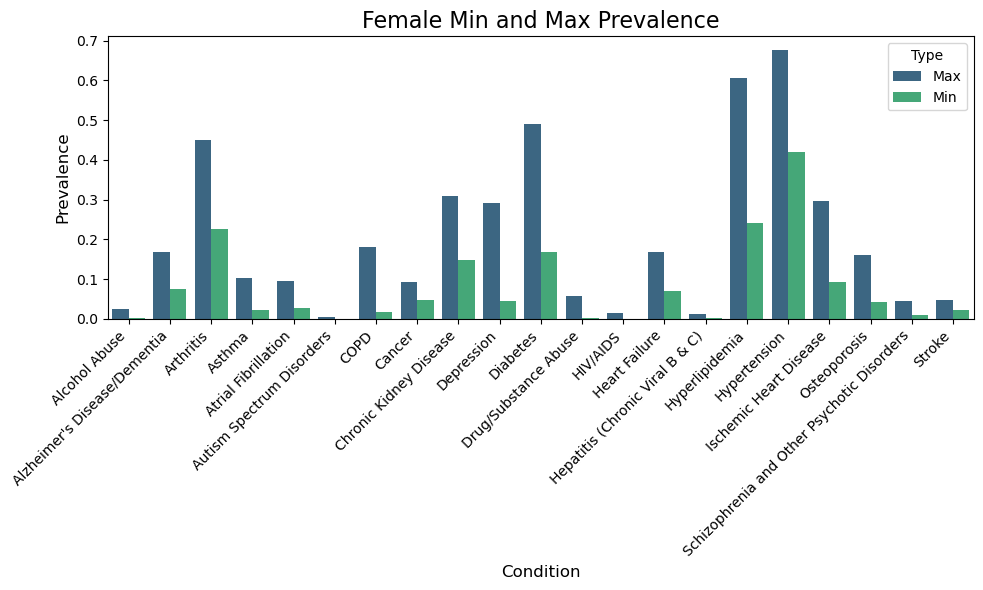

In [23]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(
    data=female_prevalence,
    x="Bene_Cond", #Set Condition as x-axis
    y="Prvlnc",    #Set Prevalence as y-axis
    hue="Type",    #Color-code bars by minimum/maximum values
    errorbar=None,
    palette="viridis"
)

plt.xticks(rotation=45, ha='right')

# Add titles and labels
plt.title("Female Min and Max Prevalence", fontsize=16)
plt.xlabel("Condition", fontsize=12)
plt.ylabel("Prevalence", fontsize=12)
plt.legend(title="Type")
plt.tight_layout()

plt.show()

In the above barchart, the gender prevalence data has been sliced to show only minimum and maximum prevalence for females. Minimum prevalence is in green and maximum prevalence is in blue. Hypertension appears to have the highest maximum prevalence in females, followed by hyperlipidemia and diabetes.

### Race-Level Analysis

In [24]:
#For race-level analysis, filter dataset for 'Bene_Demo_Lvl' = Race and Bene_Age_Lvl = All
sp_race = sp[(sp.Bene_Demo_Lvl == 'Race') & (sp.Bene_Age_Lvl == 'All')]

In [25]:
#identify min and max
race_max_state = sp_race.loc[sp_race.groupby(['Bene_Cond', 'Bene_Demo_Lvl'])['Prvlnc'].idxmax()]
race_min_state = sp_race.loc[sp_race.groupby(['Bene_Cond', 'Bene_Demo_Lvl'])['Prvlnc'].idxmin()]

In [26]:
#Concat into new dataframe
race_max_state['Type'] = 'Max'
race_min_state['Type'] = 'Min'

race_prevalence = pd.concat([race_max_state, race_min_state]).sort_values(['Bene_Cond', 'Bene_Demo_Desc', 'Type'])
race_prevalence = race_prevalence[['Bene_Cond','Type','Bene_Demo_Desc','Prvlnc','Bene_Geo_Desc']]
race_prevalence

,Bene_Cond,Type,Bene_Demo_Desc,Prvlnc,Bene_Geo_Desc
27617,Alcohol Abuse,Min,Asian Pacific Islander,0.0000,Puerto Rico
24473,Alcohol Abuse,Max,Native American,0.1102,New Hampshire
27632,Alzheimer's Disease/Dementia,Min,Asian Pacific Islander,0.0000,Puerto Rico
17870,Alzheimer's Disease/Dementia,Max,Hispanic,0.1911,Florida
30488,Arthritis,Min,Native American,0.0000,Virgin Islands
21986,Arthritis,Max,non-Hispanic Black,0.4069,Michigan
27662,Asthma,Min,Asian Pacific Islander,0.0000,Puerto Rico
16955,Asthma,Max,Hispanic,0.1278,Connecticut
17603,Atrial Fibrillation,Min,Native American,0.0000,District of Columbia
16979,Atrial Fibrillation,Max,non-Hispanic White,0.1185,Connecticut


The above dataframe lists the race and state associated with the min and max prevelance of each condition